# My first pyspark notebook


For windows, follow the install instructions at: https://medium.com/@GalarnykMichael/install-spark-on-windows-pyspark-4498a5d8d66c

Launch pyspark from the Command Prompt: pyspark --master local[*]

Codes and examples taken from "Spark in 1h" by Thibaud Vienne

## 1. Spark Core: Manipulate a first RDD (Resilient Distributed Dataset)

In [16]:
# Create an RDD (~list of list where you can store any type)
rdd1 = sc.parallelize(["Boston, 24, 09-07-2007","Cambridge, 25, 06-05-2008","New York, 28, 03-27-2011", "Paris, 28, 06-05-2011"])

# Apply a first transformation (function that transform an RDD into another RDD): map
rdd2 = rdd1.map(lambda x: x.split(","))

# Apply a filter (on rows)
rdd3 = rdd2.filter(lambda x: 'Paris' in x)

# Print
rdd3.collect()

[['Paris', ' 28', ' 06-05-2011']]

In [18]:
# Apply a first action (function returning a result): count 

print rdd1.count()
print rdd2.count()
print rdd3.count()

4
4
1


In [21]:
# Apply another action: reduce 

rdd = sc.parallelize([5,6,7])
print rdd.collect()
rdd.reduce(lambda x,y: x+y)

[5, 6, 7]


18

## 2. Spark SQL: Spark's DataFrame

In [24]:
from pyspark.sql import SQLContext

sqlcontext = SQLContext(sc)

In [30]:
# Create RDD
rdd = sc.parallelize(["Boston, 24, 09-07-2007","Cambridge, 25, 06-05-2008","New York, 28, 03-27-2011", "Paris, 28, 06-05-2011"])
rdd = rdd.map(lambda x: x.split(","))

#Create DataFrame from RDD
df = sqlcontext.createDataFrame(rdd, ["City", "Age", "Date"])
df.collect()

[Row(City=u'Boston', Age=u' 24', Date=u' 09-07-2007'),
 Row(City=u'Cambridge', Age=u' 25', Date=u' 06-05-2008'),
 Row(City=u'New York', Age=u' 28', Date=u' 03-27-2011'),
 Row(City=u'Paris', Age=u' 28', Date=u' 06-05-2011')]

In [33]:
# Use select to select columns
df.select(['City',"Date"]).collect()

[Row(City=u'Boston', Date=u' 09-07-2007'),
 Row(City=u'Cambridge', Date=u' 06-05-2008'),
 Row(City=u'New York', Date=u' 03-27-2011'),
 Row(City=u'Paris', Date=u' 06-05-2011')]

In [39]:
# Like Pandas' DataFrame, we can select a column like an attribute
df.City

Column<City>

In [36]:
# We use filter to select some rows
df.filter(df.City == 'Cambridge').collect()

[Row(City=u'Cambridge', Age=u' 25', Date=u' 06-05-2008')]

## 2. Compute Pi

https://spark.apache.org/examples.html

This code estimates $π$ by "throwing darts" at a circle. We pick random points in the unit square ((0, 0) to (1,1)) and see how many fall in the unit circle. The fraction should be $π$ / 4, so we use this to get our estimate.

### 2.1. Without Spark

In [50]:
import time
import random

num_samples = 10000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

start = time.time()

count = []
for i in range(num_samples):
    count.append(inside(1))

pi = 4 * sum(count) / (num_samples+0.0)
print pi

print "Without Spark, simulating", num_samples, "takes", round(time.time()-start,0), "seconds"


3.141902
Without Spark, simulating 10000000 takes 5.0 seconds


### 2.2. With Spark

In [52]:
start = time.time()

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / (num_samples+0.0)
print(pi)

print "With Spark, simulating", num_samples, "takes", round(time.time()-start,0), "seconds"


3.1421124
With Spark, simulating 10000000 takes 7.0 seconds


### 2.3. Visualization

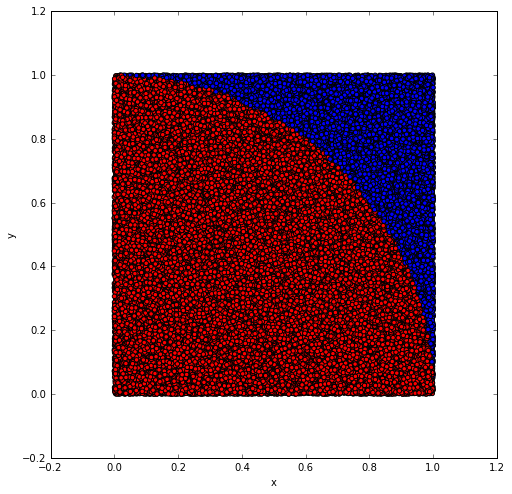

In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

num_samples = 100000

def inside(p):     
  x, y = random.random(), random.random()
  return [x, y, x*x + y*y < 1]

l = []
for i in range(num_samples):
    l.append(inside(1))

df_l = pd.DataFrame(l, columns=['x','y','inside?'])

colors = {True:'red', False:'blue'}
df_l.plot.scatter(x = 'x', y = 'y', c = df_l['inside?'].apply(lambda x: colors[x]), figsize=(8,8))
plt.show()

# 3. Spark ML